<a href="https://colab.research.google.com/github/Armybrat21/PRODIGY_DS_05/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('traffic accident.csv')

In [3]:
data.head
print(data.head())

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [4]:
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


In [5]:
date_time_column = None
for col in data.columns:
    if 'Time' in col or 'Date' in col:
        date_time_column = col
        break

In [6]:
if date_time_column:
    print(f"\nFound a potential date/time column: {date_time_column}")
else:
    print("\nNo obvious date/time column found. Please check the column names to identify the correct one.")


Found a potential date/time column: Time


In [7]:
if date_time_column:
   data = data.dropna()

In [8]:
data[date_time_column] = pd.to_datetime(data[date_time_column])

<ipython-input-8-eefb43b4ce87>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[date_time_column] = pd.to_datetime(data[date_time_column])
<ipython-input-8-eefb43b4ce87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[date_time_column] = pd.to_datetime(data[date_time_column])


In [9]:
data['Hour'] = data[date_time_column].dt.hour

<ipython-input-9-b6969346748f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour'] = data[date_time_column].dt.hour


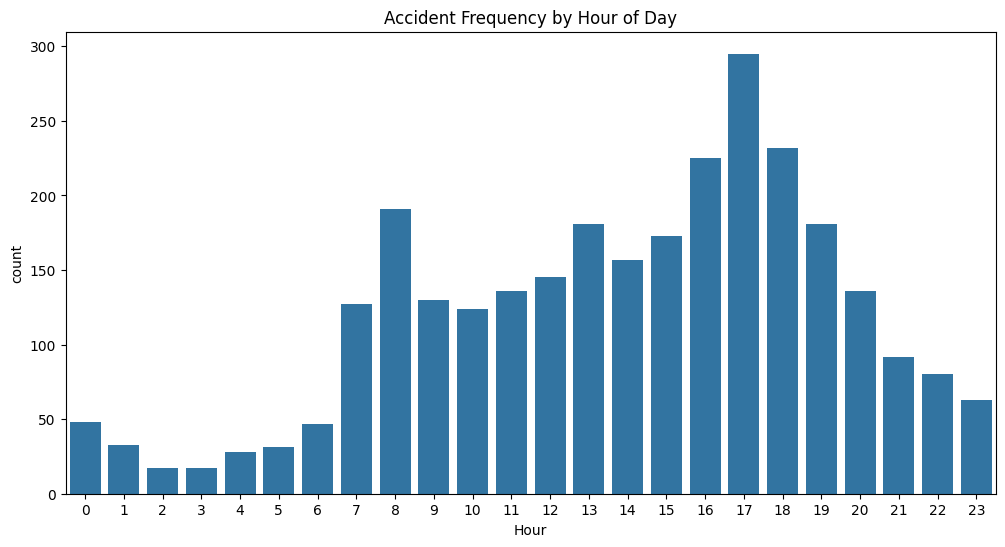

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=data)
plt.title('Accident Frequency by Hour of Day')
plt.show()

In [11]:
if 'Weather_Condition' in data.columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(y='Weather_Condition', data=data, order=data['Weather_Condition'].value_counts().index[:10])
        plt.title('Top 10 Accident Frequencies by Weather Condition')
        plt.show()

In [12]:
data['DayOfWeek'] = data[date_time_column].dt.day_name()
cross_table = pd.crosstab(data['Hour'], data['DayOfWeek'])

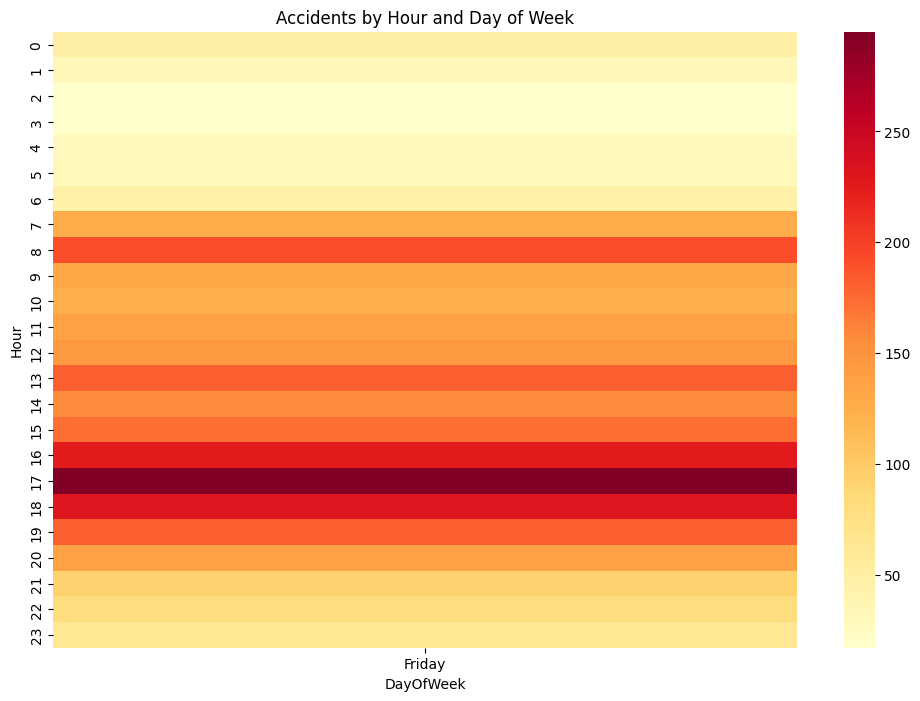

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(cross_table, cmap='YlOrRd')
plt.title('Accidents by Hour and Day of Week')
plt.show()